# 2d modules handle 3d Contexts

- The module shapes are critical in regards to the size of the representable space
- If we work with modulo arithmetic we have to avoid similar and square shapes...
- I guess that is why some times the columns below the feature seem pronounced (see the results section)

In [365]:
import numpy as np
import matplotlib.pyplot as plt
from htmresearch.support.gridcells.context_integration.context_layer import ContextLayer
from htmresearch.support.gridcells.context_integration.utils import (create_module_shape, 
                                                                     create_action_tensor, 
                                                                     get_3d_actions, 
                                                                     get_closed_3d_path,
                                                                     load_digit_features)

from scipy.stats import entropy

%matplotlib inline
%load_ext autoreload
%autoreload 2



m = 10   # Number of modules
n = 40   # Approximate number of cells per module dimension
d = 20   # Cells per minicolumn


zero = np.zeros(2*m)
dx,dy,dz = get_3d_actions(m)

module_shapes = create_module_shape(m,n, rmin=-10,rmax=5)
action_tensor = create_action_tensor(m) 

X, V = get_closed_3d_path(num_samples=20, radius=5)

CL  = ContextLayer(layer_height=d, module_shapes=module_shapes, action_map=action_tensor, max_activity=500) 

F = load_digit_features(w=10, shape=CL.layer.shape)

print CL

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

**Context Layer:**
------------------
Number of cells:	 15260
Layer Shape:		 (20, 763)
Hyper-Module Shapes:
[[40 44]
 [44 38]
 [38 44]
 [36 41]
 [33 36]
 [44 35]
 [30 43]
 [41 40]
 [38 35]
 [45 30]]
Module bounds: [    0  1760  3432  5104  6580  7768  9308 10598 12238 13568 14918]
Number of grid cells:	 14918
Activity bound:		 500
------------------


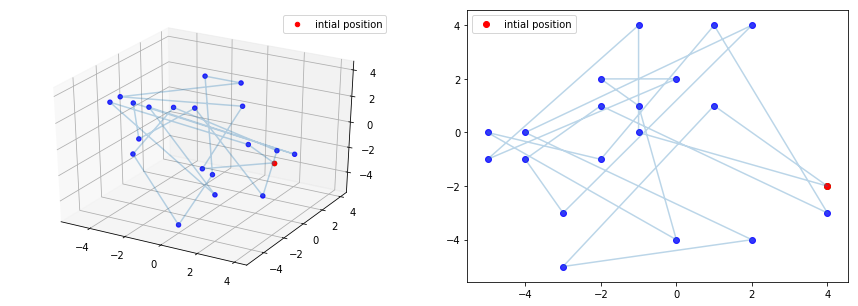

In [366]:

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121, projection='3d')
ax.plot(X[:,0],X[:,1],X[:,2], alpha=0.3)
ax.scatter(X[0,0],X[0,1],X[0,2], color="green", alpha=1.)
ax.scatter(X[1:-1,0],X[1:-1,1],X[1:-1,2], color="blue", alpha=0.8)
ax.scatter(X[-1,0],X[-1,1],X[-1,2], color="red", alpha=1., label="intial position")
plt.legend()


ax = fig.add_subplot(122)
ax.plot(X[:,0],X[:,1], alpha=0.3)
ax.scatter(X[0,0],X[0,1], color="green", alpha=1.)
ax.scatter(X[1:-1,0],X[1:-1,1], color="blue", alpha=0.8)
ax.scatter(X[-1,0],X[-1,1], color="red", alpha=1., label="intial position")
plt.legend()
plt.show()


# Results

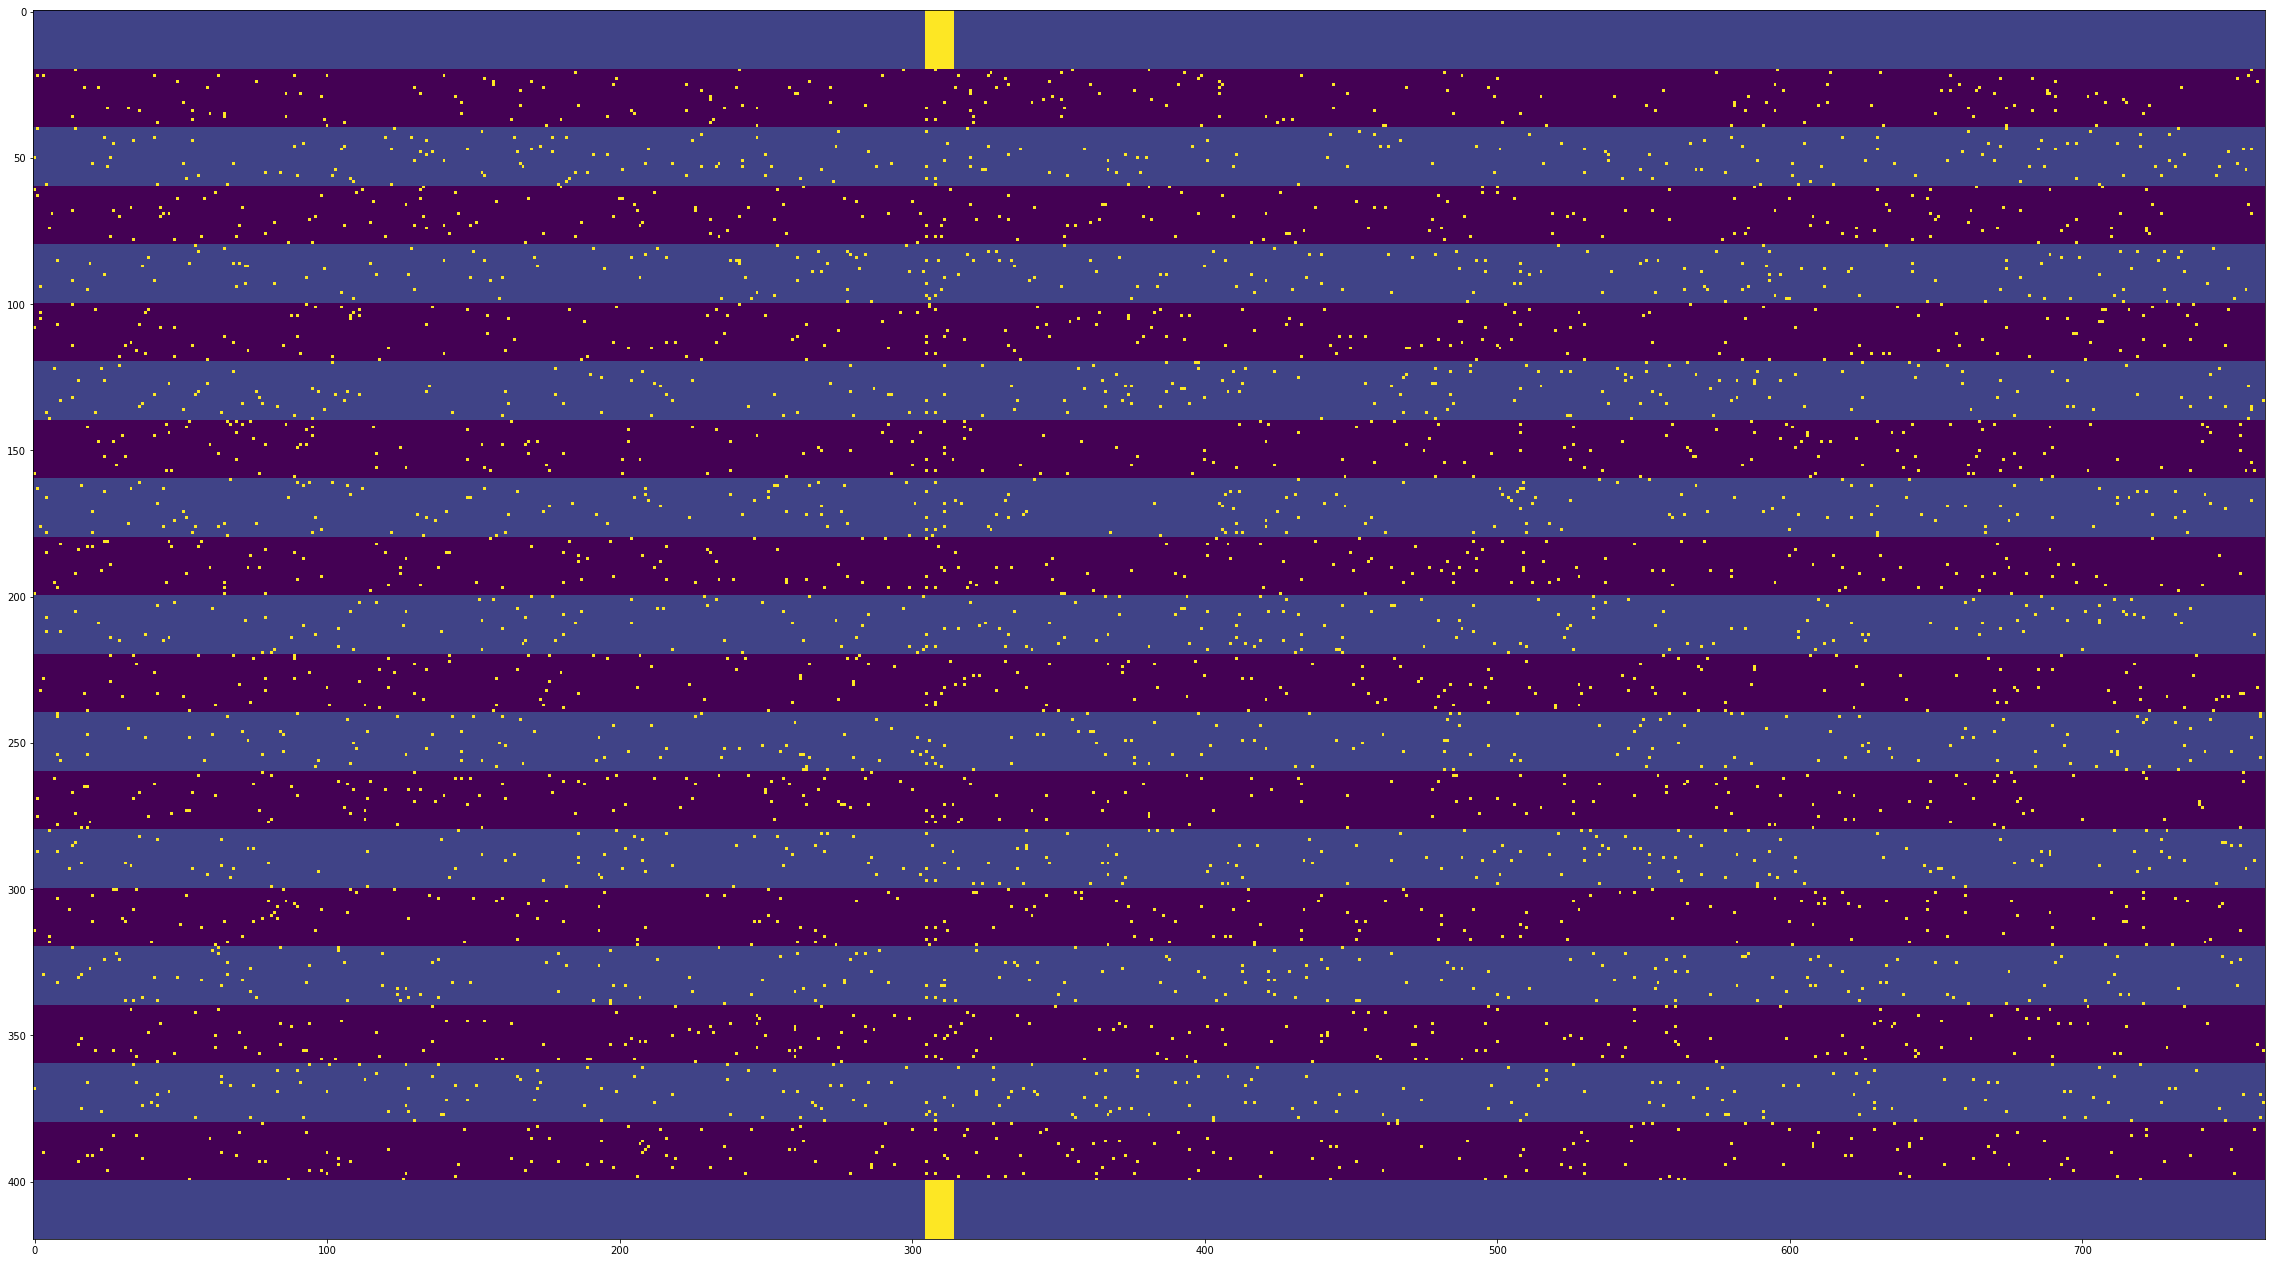

In [367]:

CL.clear()

CL.add(F[4])

layer_states = [0.2 + CL.layer]

 
#  Feed position updates, and
#  make sure the updates sum to zero, i.e. 
#  we return to the intital position

assert np.all(np.sum(V, axis=0)) == 0

for t in range(len(V)):
    a = V[t,0]*dx + V[t,1]*dy + V[t,2]*dz
    state = CL.explore(a, mentally=False)
    layer_states.append((t%2)*0.2 + state)


#  Each highlighted row in the image corresponds
#  to the state of the layer at a point in time

plt.figure(figsize=(40,40))
img = np.clip(np.concatenate(layer_states, axis=0),0,1)
plt.imshow(img, vmin=0, vmax=1)
plt.show()
    